In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('adult.data')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
def unique_ints(column_name: str):
    series = df[column_name].map(
        {v: k for k, v in enumerate(np.unique(df[column_name]))}
    )
    return series

In [5]:
for col_name in df.columns:
    if np.dtype(df[col_name]) == np.dtype('O') :
        df[col_name] = unique_ints(column_name=col_name)

In [6]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [7]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0


In [8]:
X, y = df.iloc[:, : 14].values, df.iloc[:, 14].values

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y, test_size=0.3)

In [11]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
log_re = LogisticRegression(random_state=1, C=0.5, penalty='l1', solver='saga')
log_re.fit(X_train_std, y_train)
y_pred = log_re.predict(X_test_std)
print(f'miss_class: {(y_test != y_pred).sum()}')
print(f"acc: {log_re.score(X_test_std, y_test)}")

miss_class: 1705
acc: 0.8254683181492476


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_train_std)
pca.transform(X_train_std)

array([[ 0.12425333, -0.26876782,  1.01407191, ..., -0.69546127,
        -0.39241069,  1.79873457],
       [-2.74445558,  1.6452635 , -0.98930819, ...,  1.10950541,
        -0.25130208,  0.07240881],
       [-0.19259575, -1.05576759, -0.93299702, ...,  0.82158597,
         0.37918476,  1.21649925],
       ...,
       [-1.99979792, -0.38523785,  0.77065904, ...,  0.94870213,
         0.02382561, -0.13701942],
       [-2.25332763, -1.37716156,  0.24682384, ..., -0.71146552,
        -0.71002014,  0.6034237 ],
       [-0.78591161, -0.77210168,  0.26505178, ..., -0.85963392,
         0.55230151,  0.16418154]])

In [14]:
exp_var = pca.explained_variance_

In [15]:
cumsum_var = np.cumsum(exp_var)

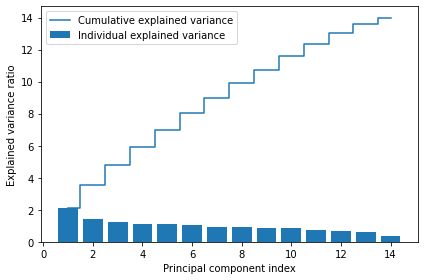

In [16]:
plt.bar(range(1,15), exp_var, align='center', label='Individual explained variance')
plt.step(range(1, 15), cumsum_var, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [17]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
sklearn_loadings[: , 0]

array([ 0.41455953,  0.29641721, -0.06834628,  0.15491109,  0.31225721,
       -0.4737836 ,  0.23530943, -0.76079676,  0.23164381,  0.66704995,
        0.20479064,  0.16526648,  0.54844183,  0.06529274])

In [18]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [19]:
log_re.fit(X_train_pca, y_train)
y_pred = log_re.predict(X_test_pca)
print(f'miss_class: {(y_test != y_pred).sum()}')
print(f"acc: {log_re.score(X_test_pca, y_test)}")

miss_class: 1733
acc: 0.8226021087112294
